In [16]:
# importing the required module 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [17]:
#Optional for disabling warnings 
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [42]:
    warnings.simplefilter("ignore")
#Set figure resolution to 300dpi
import matplotlib as mpl
%matplotlib inline
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [19]:
df = pd.read_excel (r'./Fall24_Bio212.xlsx', index_col=0) 
df.describe()

,ID,SIS User ID,Exam 1,Exam1_percent,Exam1_score,Study_Guide_avg,Non_Study_Guide_avg
count,28.000000,27.0,22.000000,22.000000,22.000000,5.000000,17.000000
mean,170879.571429,900000000.0,56.090909,0.692480,69.248036,84.444444,64.778504
std,78946.472902,0.0,15.344176,0.189434,18.943427,9.222148,18.877022
min,2673.000000,900000000.0,25.000000,0.308642,30.864198,75.308642,30.864198
25%,171982.250000,900000000.0,44.750000,0.552469,55.246914,75.308642,54.320988
50%,198200.000000,900000000.0,55.000000,0.679012,67.901235,85.185185,61.111111
75%,221233.750000,900000000.0,68.375000,0.844136,84.413580,90.123457,77.777778
max,242753.000000,900000000.0,79.000000,0.975309,97.530864,96.296296,97.530864


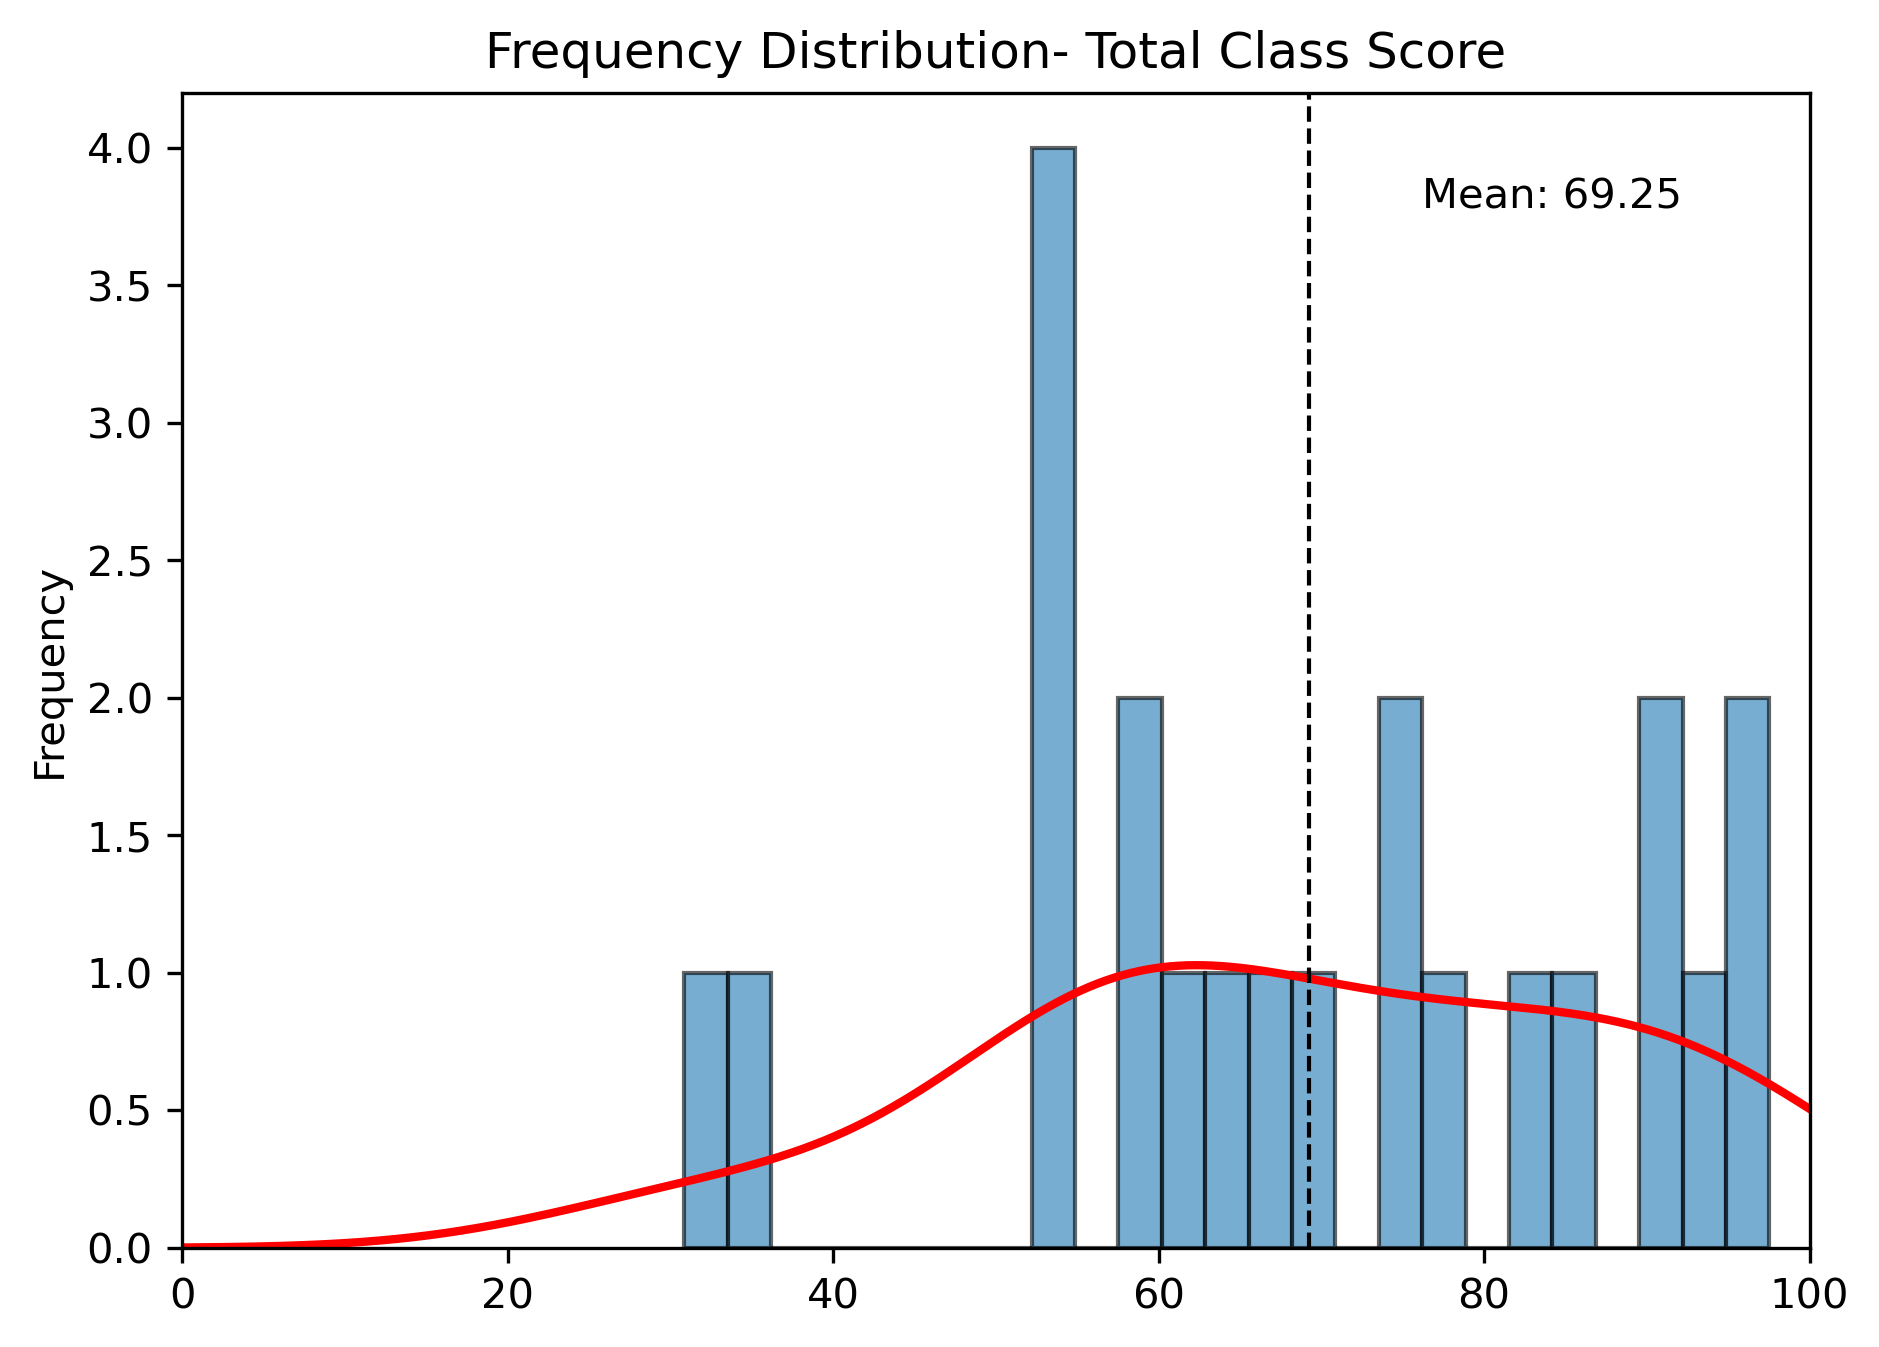

In [53]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
import seaborn as sns

# Setup for inline plots and figure size
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':300})

# Plot Histogram on x
x1 = df['Exam1_score'].dropna()

# Define number of bins for the histogram
bins = 25

# Plot histogram with actual frequency (density=False)
count_x1, bins_x1, _ = plt.hist(x1, bins=bins, edgecolor='k', alpha=0.6, density=False)
plt.gca().set(title='Frequency Distribution- Total Class Score', ylabel='Frequency')
plt.xlim(0, 100)

# Add KDE curve
kde_x1 = gaussian_kde(x1)
x1_range = np.linspace(0, 100, 1000)  # Generate x-values for KDE curve

# Scale KDE by the number of data points and the bin width to match the histogram's frequency scale
bin_width_x1 = bins_x1[1] - bins_x1[0]
plt.plot(x1_range, kde_x1(x1_range) * len(x1) * bin_width_x1, color='r', linewidth=2)

# Plot vertical line for mean
plt.axvline(x1.mean(), color='k', linestyle='dashed', linewidth=1)

# Add mean text
min_ylim, max_ylim = plt.ylim()
plt.text(x1.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(x1.mean()))

# Display the plot
plt.show()

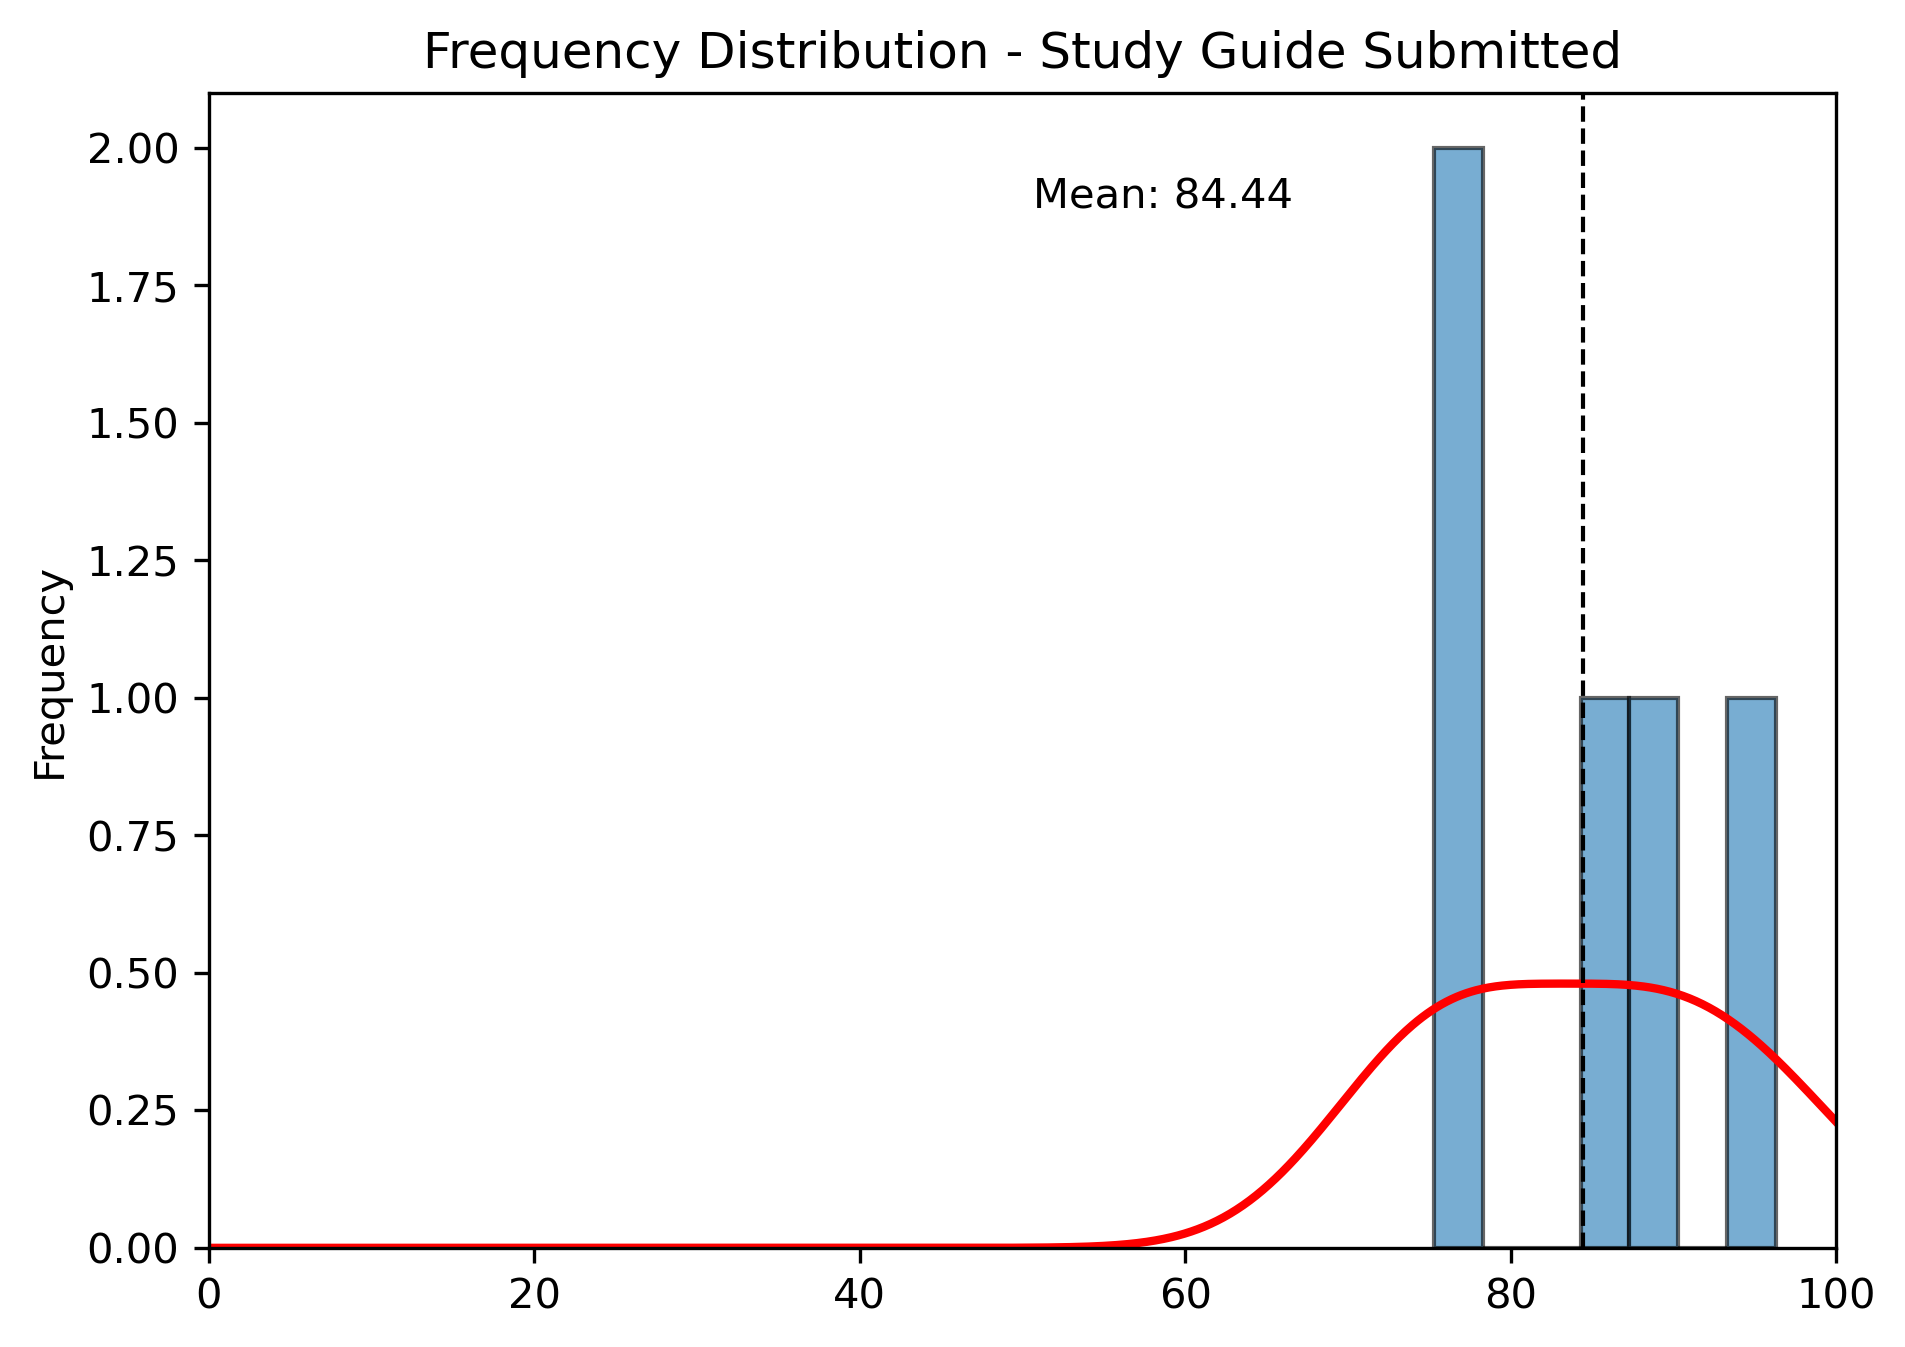

In [51]:
# Plot Histogram on x
x2 = df['Study_Guide_avg'].dropna()

# Define number of bins for the histogram
bins = 7

# Plot histogram with actual frequency (density=False)
count_x2, bins_x2, _ = plt.hist(x2, bins=bins, edgecolor='k', alpha=0.6, density=False)
plt.gca().set(title='Frequency Distribution - Study Guide Submitted', ylabel='Frequency')
plt.xlim(0, 100)

# Add KDE curve
kde_x2 = gaussian_kde(x2)
x2_range = np.linspace(0, 100, 1000)  # Generate x-values for KDE curve

# Scale KDE by the number of data points and the bin width to match the histogram's frequency scale
bin_width_x2 = bins_x2[1] - bins_x2[0]
plt.plot(x2_range, kde_x2(x2_range) * len(x2) * bin_width_x2, color='r', linewidth=2)

# Plot vertical line for mean
plt.axvline(x2.mean(), color='k', linestyle='dashed', linewidth=1)

# Add mean text
min_ylim, max_ylim = plt.ylim()
plt.text(x2.mean()*0.6, max_ylim*0.9, 'Mean: {:.2f}'.format(x2.mean()))

# Display the plot
plt.show()

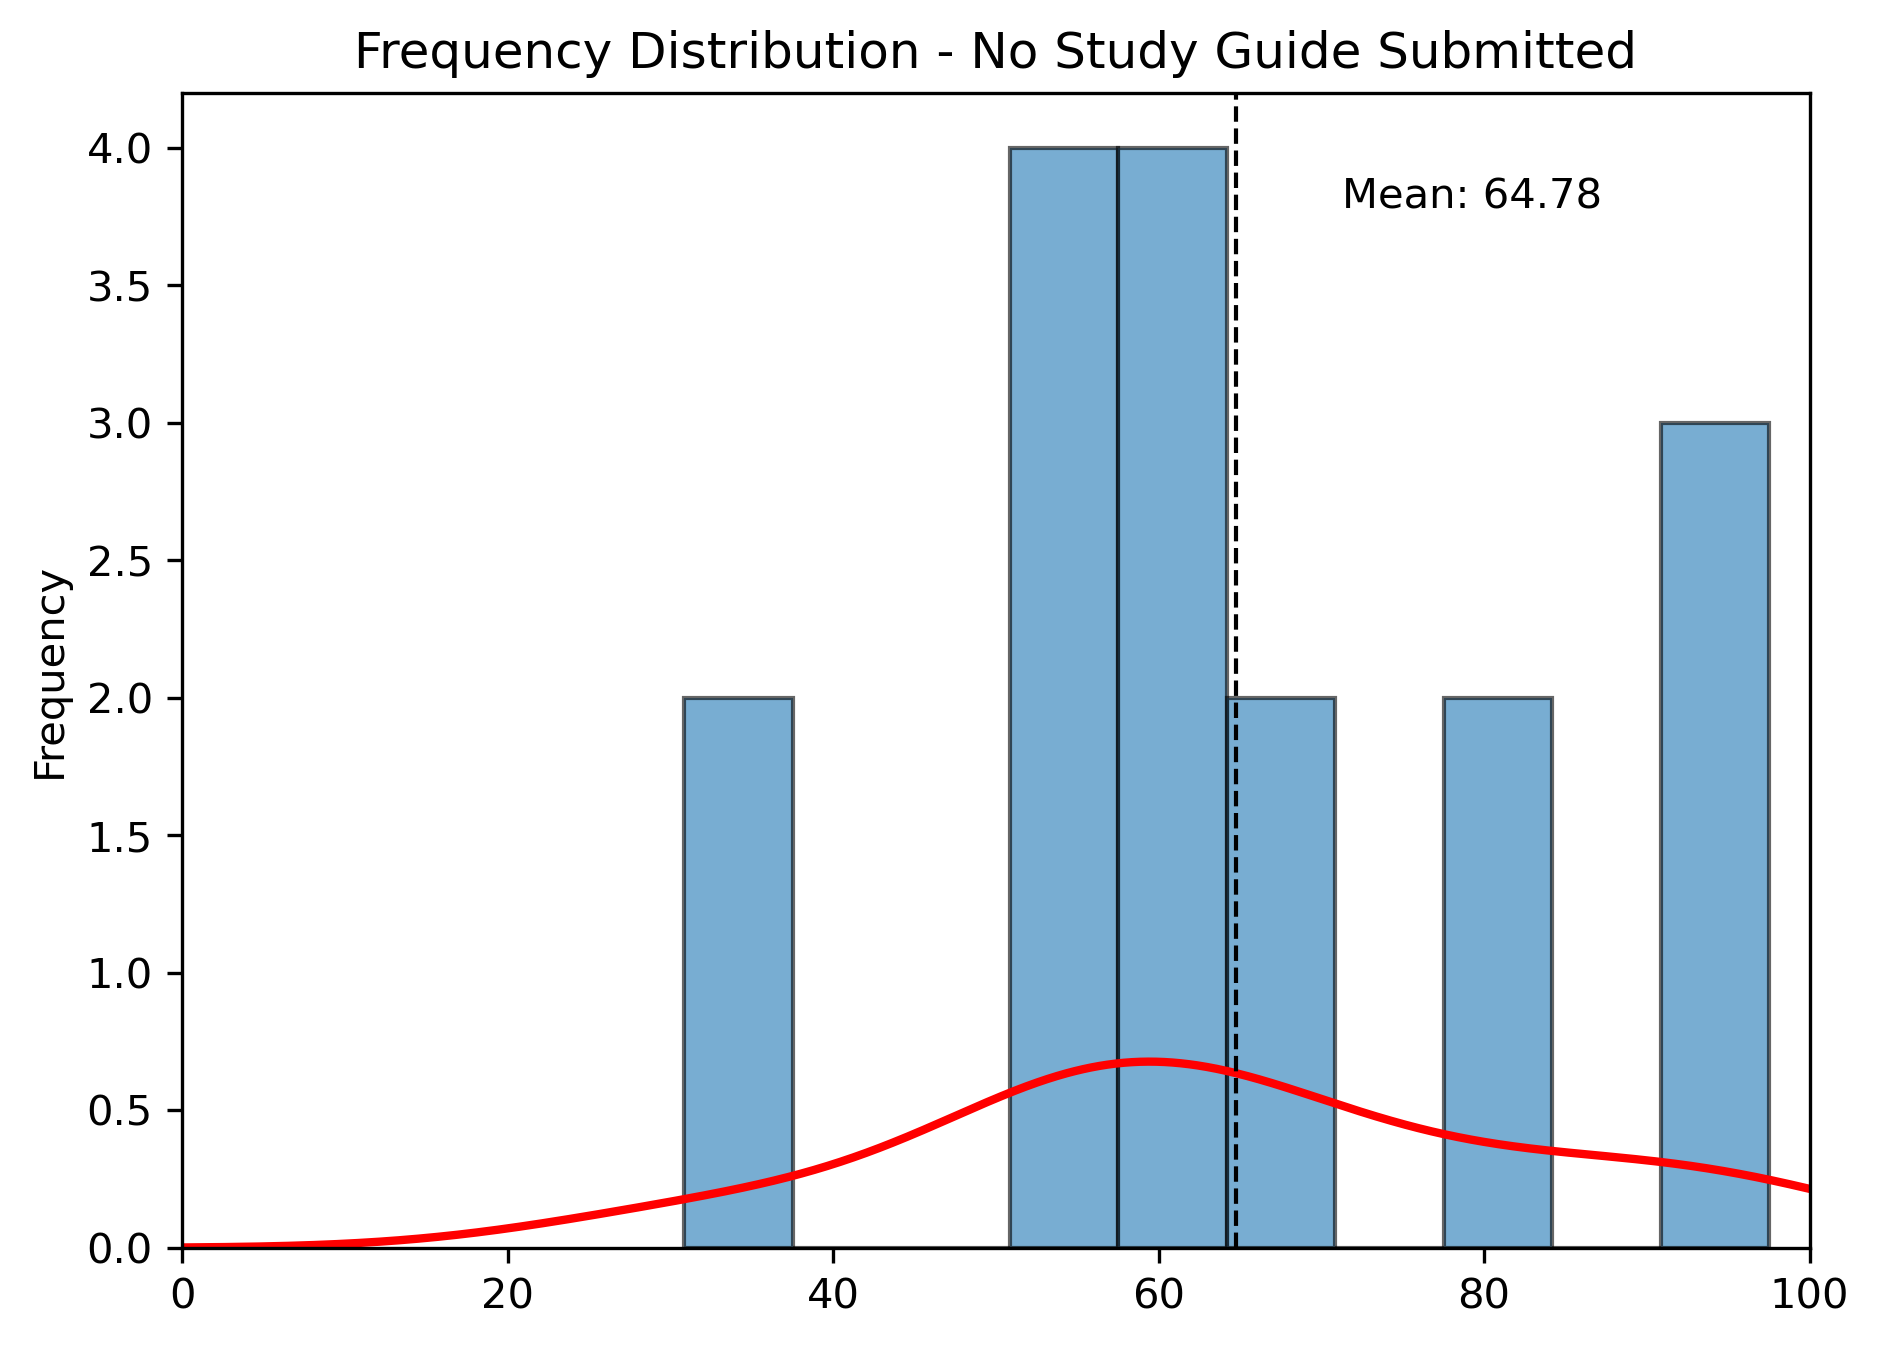

In [50]:
# Plot Histogram on x
x3 = df.Non_Study_Guide_avg.dropna()

# Define number of bins for the histogram
bins = 10

# Plot histogram with actual frequency (density=False)
count_x3, bins_x3, _ = plt.hist(x3, bins=bins, edgecolor='k', alpha=0.6, density=False)
plt.gca().set(title='Frequency Distribution - No Study Guide Submitted', ylabel='Frequency')
plt.xlim(0, 100)

# Add KDE curve
kde_x3 = gaussian_kde(x3)
x3_range = np.linspace(0, 100, 1000)  # Generate x-values for KDE curve

# Scale KDE by the number of data points and the bin width to match the histogram's frequency scale
bin_width_x3 = bins_x3[1] - bins_x3[0]
plt.plot(x3_range, kde_x3(x3_range) * len(x2) * bin_width_x3, color='r', linewidth=2)

# Plot vertical line for mean
plt.axvline(x3.mean(), color='k', linestyle='dashed', linewidth=1)

# Add mean text
min_ylim, max_ylim = plt.ylim()
plt.text(x3.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(x3.mean()))

# Display the plot
plt.show()


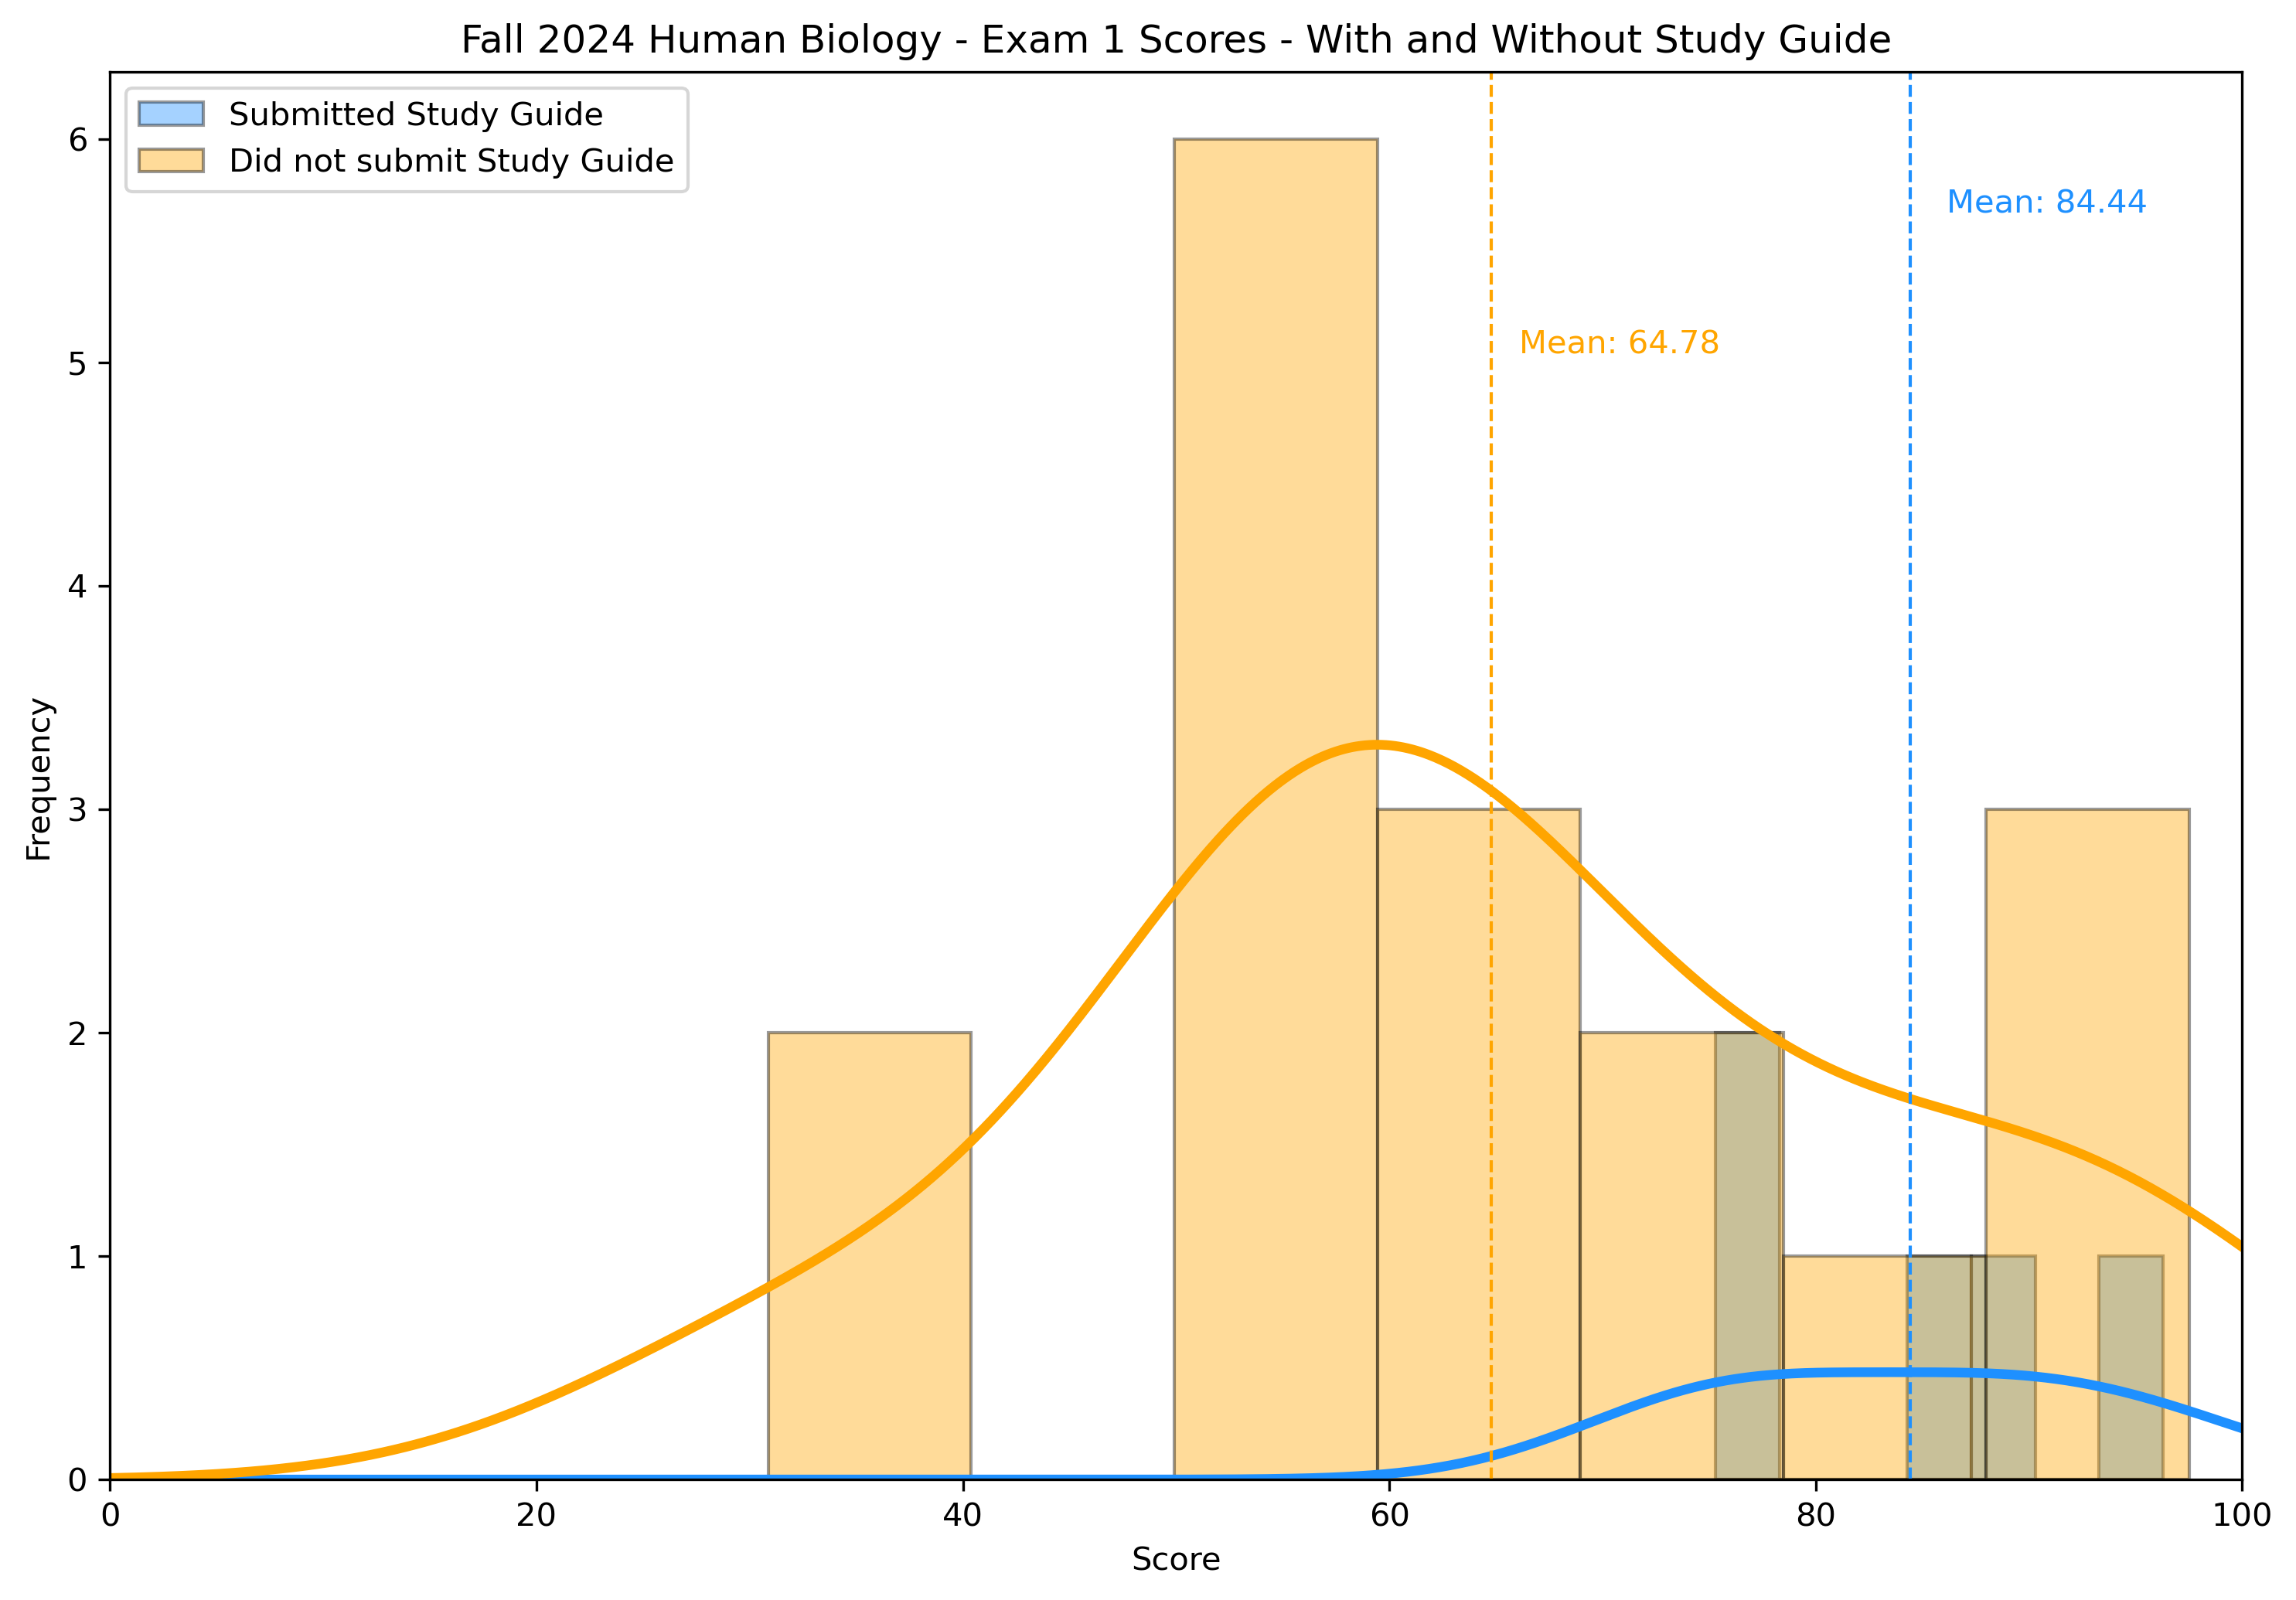

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import numpy as np

# Sample data for groups x2 and x3
x2 = df.Study_Guide_avg.dropna()  # Assuming x2 is for "Submitted Study Guide"
x3 = df.Non_Study_Guide_avg.dropna()  # Assuming x3 is for "Did not submit Study Guide"

# Number of bins for the histogram
bins = 7

# Setup for inline plots and figure size
plt.figure(figsize=(10, 7), dpi=300)

# Plot histograms for both groups with actual frequency values (density=False)
count_x2, bins_x2, _ = plt.hist(x2, bins=bins, color="dodgerblue", label="Submitted Study Guide", 
                                alpha=0.4, edgecolor='k')
count_x3, bins_x3, _ = plt.hist(x3, bins=bins, color="orange", label="Did not submit Study Guide", 
                                alpha=0.4, edgecolor='k')

# KDE for group x2
kde_x2 = gaussian_kde(x2)
x2_range = np.linspace(0, 100, 1000)  # Generate x-values for KDE curve

# Scale KDE by the number of data points and the bin width to match histogram scale
bin_width_x2 = bins_x2[1] - bins_x2[0]
plt.plot(x2_range, kde_x2(x2_range) * len(x2) * bin_width_x2, color='dodgerblue', linewidth=3)

# KDE for group x3
kde_x3 = gaussian_kde(x3)
x3_range = np.linspace(0, 100, 1000)  # Generate x-values for KDE curve

# Scale KDE by the number of data points and the bin width to match histogram scale
bin_width_x3 = bins_x3[1] - bins_x3[0]
plt.plot(x3_range, kde_x3(x3_range) * len(x3) * bin_width_x3, color='orange', linewidth=3)

# Add vertical lines for the means
plt.axvline(x2.mean(), color='dodgerblue', linestyle='dashed', linewidth=1)
plt.axvline(x3.mean(), color='orange', linestyle='dashed', linewidth=1)

# Add text labels for means
min_ylim, max_ylim = plt.ylim()
plt.text(x2.mean() * 1.02, max_ylim * 0.9, 'Mean: {:.2f}'.format(x2.mean()), color="dodgerblue")
plt.text(x3.mean() * 1.02, max_ylim * 0.8, 'Mean: {:.2f}'.format(x3.mean()), color="orange")

# Customize plot
plt.xlim(0, 100)
plt.legend()
plt.gca().set(title='Fall 2024 Human Biology - Exam 1 Scores - With and Without Study Guide',
              ylabel='Frequency', xlabel='Score')

plt.tight_layout()
plt.show()